In [3]:
import numpy as np
import netCDF4 as nc
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [4]:
dset_in = xr.open_dataset('surfdata_1.9x2.5_hist_16pfts_Irrig_CMIP6_simyr2000_c190304.nc')

In [5]:
dset_in

<xarray.Dataset>
Dimensions:                  (cft: 2, lsmlat: 96, lsmlon: 144, lsmpft: 17, natpft: 15, nglcec: 10, nglcecp1: 11, nlevsoi: 10, nlevurb: 5, numrad: 2, numurbl: 3, time: 12)
Coordinates:
  * natpft                   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * cft                      (cft) int32 15 16
  * time                     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: lsmlat, lsmlon, lsmpft, nglcec, nglcecp1, nlevsoi, nlevurb, numrad, numurbl
Data variables:
    mxsoil_color             int32 ...
    SOIL_COLOR               (lsmlat, lsmlon) int32 ...
    PCT_SAND                 (nlevsoi, lsmlat, lsmlon) float64 ...
    PCT_CLAY                 (nlevsoi, lsmlat, lsmlon) float64 ...
    ORGANIC                  (nlevsoi, lsmlat, lsmlon) float64 ...
    FMAX                     (lsmlat, lsmlon) float64 ...
    LANDFRAC_PFT             (lsmlat, lsmlon) float64 ...
    PFTDATA_MASK             (lsmlat, lsmlon) int32 ...
    PCT_NATVEG               (lsmlat, lsmlon) float64 ...
    PCT_CROP                 (lsmlat, lsmlon) float64 ...
    PCT_NAT_PFT              (natpft, lsmlat, lsmlon) float64 ...
    PCT_CFT                  (cft, lsmlat, lsmlon) float64 ...
    MONTHLY_LAI              (time, lsmpft, lsmlat, lsmlon) float64 ...
    MONTHLY_SAI              (time, lsmpft, lsmlat, lsmlon) float64 ...
    MONTHLY_HEIGHT_TOP       (time, lsmpft, lsmlat, lsmlon) float64 ...
    MONTHLY_HEIGHT_BOT       (time, lsmpft, lsmlat, lsmlon) float64 ...
    AREA                     (lsmlat, lsmlon) float64 ...
    LONGXY                   (lsmlat, lsmlon) float64 ...
    LATIXY                   (lsmlat, lsmlon) float64 ...
    EF1_BTR                  (lsmlat, lsmlon) float64 ...
    EF1_FET                  (lsmlat, lsmlon) float64 ...
    EF1_FDT                  (lsmlat, lsmlon) float64 ...
    EF1_SHR                  (lsmlat, lsmlon) float64 ...
    EF1_GRS                  (lsmlat, lsmlon) float64 ...
    EF1_CRP                  (lsmlat, lsmlon) float64 ...
    CANYON_HWR               (numurbl, lsmlat, lsmlon) float64 ...
    EM_IMPROAD               (numurbl, lsmlat, lsmlon) float64 ...
    EM_PERROAD               (numurbl, lsmlat, lsmlon) float64 ...
    EM_ROOF                  (numurbl, lsmlat, lsmlon) float64 ...
    EM_WALL                  (numurbl, lsmlat, lsmlon) float64 ...
    HT_ROOF                  (numurbl, lsmlat, lsmlon) float64 ...
    THICK_ROOF               (numurbl, lsmlat, lsmlon) float64 ...
    THICK_WALL               (numurbl, lsmlat, lsmlon) float64 ...
    T_BUILDING_MIN           (numurbl, lsmlat, lsmlon) float64 ...
    WIND_HGT_CANYON          (numurbl, lsmlat, lsmlon) float64 ...
    WTLUNIT_ROOF             (numurbl, lsmlat, lsmlon) float64 ...
    WTROAD_PERV              (numurbl, lsmlat, lsmlon) float64 ...
    ALB_IMPROAD_DIR          (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_IMPROAD_DIF          (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_PERROAD_DIR          (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_PERROAD_DIF          (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_ROOF_DIR             (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_ROOF_DIF             (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_WALL_DIR             (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_WALL_DIF             (numrad, numurbl, lsmlat, lsmlon) float64 ...
    TK_ROOF                  (nlevurb, numurbl, lsmlat, lsmlon) float64 ...
    TK_WALL                  (nlevurb, numurbl, lsmlat, lsmlon) float64 ...
    TK_IMPROAD               (nlevurb, numurbl, lsmlat, lsmlon) float64 ...
    CV_ROOF                  (nlevurb, numurbl, lsmlat, lsmlon) float64 ...
    CV_WALL                  (nlevurb, numurbl, lsmlat, lsmlon) float64 ...
    CV_IMPROAD               (nlevurb, numurbl, lsmlat, lsmlon) float64 ...
    NLEV_IMPROAD             (numurbl, lsmlat, lsmlon) int32 ...
    peatf                    (ls

In [20]:
pfts = dset_in.PCT_NAT_PFT

In [23]:
pftsmask    = pfts.where(pfts>0.005)
pftsmask    = pftsmask.rename({'natpft':'pft','lsmlat':'lat','lsmlon':'lon'})

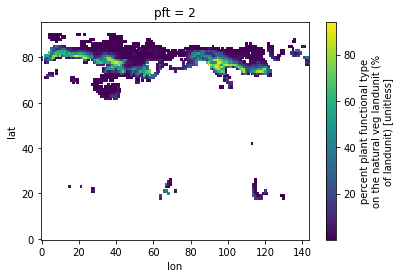

In [28]:
pftsmask.isel(pft=slice(2,3)).plot()

In [ ]:
#REGREDING: https://github.com/NCAR/ctsm_python_gallery/blob/master/notebooks/PFT-Gridding.ipynb
#to visualize: http://localhost:8889/notebooks/Desktop/forces-2021/content/learning/example-notebooks/projections.ipynb

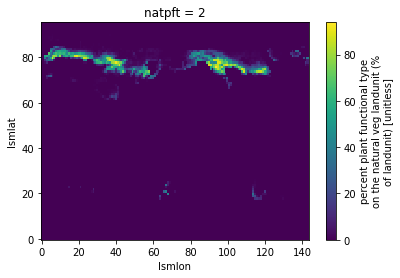

In [18]:
dset_in.PCT_NAT_PFT.isel(natpft=2).plot()

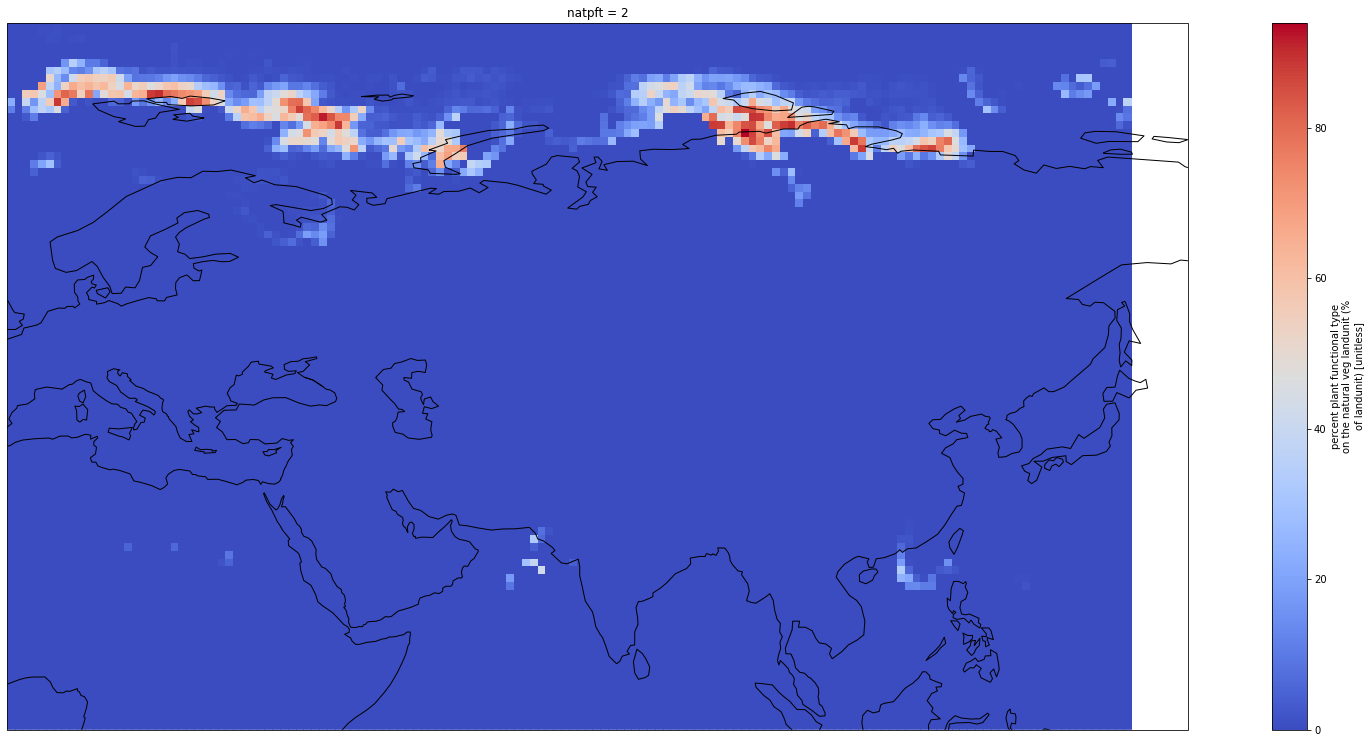

In [16]:
fig = plt.figure(1, figsize=[30,13])
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

dset_in.PCT_NAT_PFT.isel(natpft=2).plot.pcolormesh(ax=ax, cmap='coolwarm')